In [1]:
import pandas as pd

In [3]:
df = pd.concat([pd.read_csv('results/oracle.csv'), pd.read_csv('results/oracle-for-optimization.csv')])

In [4]:
base_robust = df.loc[(df.protocol == 'base') & (df.overseer == 'robust') & (df.adversarial_alpha == 0)]
base_weak_negligent = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0)]
base_weak_negligent_slightly_adversarial = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0.05)]
base_weak_negligent_medium_adversarial = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0.35)]
base_weak_negligent_adversarial = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0.75)]

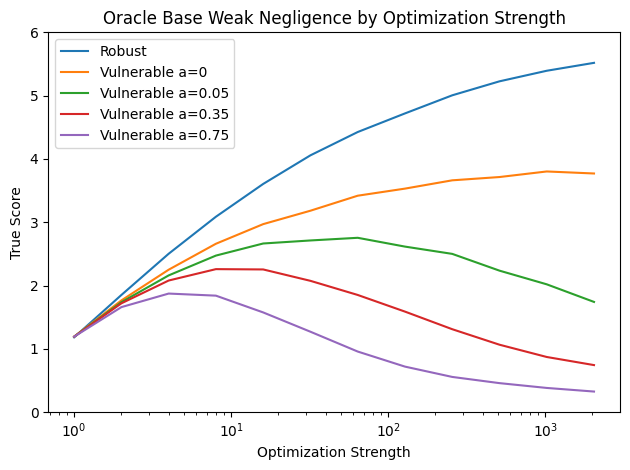

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.set_title('Oracle Base Weak Negligence by Optimization Strength')
ax.set_xlabel('Optimization Strength')
ax.set_xscale('log')
ax.set_ylabel('True Score')
ax.set_ylim(0, 6)
ax.plot(base_robust['optimization_strength'], base_robust['true_score'], label='Robust')
ax.plot(base_weak_negligent['optimization_strength'], base_weak_negligent['true_score'], label='Vulnerable a=0')
ax.plot(base_weak_negligent_slightly_adversarial['optimization_strength'], base_weak_negligent_slightly_adversarial['true_score'], label='Vulnerable a=0.05')
ax.plot(base_weak_negligent_medium_adversarial['optimization_strength'], base_weak_negligent_medium_adversarial['true_score'], label='Vulnerable a=0.35')
ax.plot(base_weak_negligent_adversarial['optimization_strength'], base_weak_negligent_adversarial['true_score'], label='Vulnerable a=0.75')

# Place the legend
ax.legend()
fig.tight_layout()


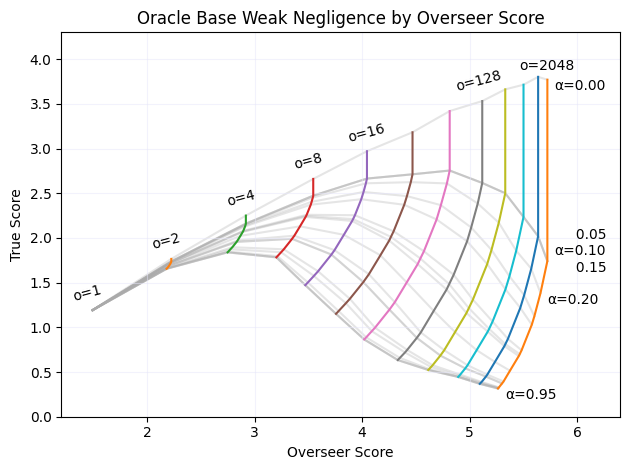

In [43]:
base_weak_negligent_all = df.loc[(df.protocol == "base") & (df.overseer == "weak-negligent")]

fig, ax = plt.subplots()

ax.set_title("Oracle Base Weak Negligence by Overseer Score")
ax.set_xlabel("Overseer Score")
ax.set_xlim(1.2, 6.4)
ax.set_ylabel("True Score")
ax.set_ylim(0, 4.3)
ax.grid(True, color='#E6E6FA', linestyle='-', alpha=0.5, zorder=0)

# First plot light grey lines for each adversarial_alpha
for adversarial_alpha in base_weak_negligent_all["adversarial_alpha"].unique():
    to_plot = base_weak_negligent_all.loc[base_weak_negligent_all.adversarial_alpha == adversarial_alpha]
    ax.plot(to_plot["overseer_estimated_score"], to_plot["true_score"], color="#AAAAAA", alpha=0.3, zorder=1)

# Then plot the optimization strength lines on top
for optimization_strength in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    to_plot = base_weak_negligent_all.loc[base_weak_negligent_all.optimization_strength == optimization_strength]
    ax.plot(
        to_plot["overseer_estimated_score"],
        to_plot["true_score"],
        label=f"Optimization Strength {optimization_strength}",
        zorder=2,
    )
    if optimization_strength == 2048:  # For the last line, add annotations
        annotation_text = {
            0.0: "α=0.00",
            0.05: "     0.05\nα=0.10\n     0.15",
            0.2: "α=0.20",
            0.95: "α=0.95",
        }
        for _, row in to_plot.iterrows():
            if text := annotation_text.get(row["adversarial_alpha"]):
                ax.annotate(
                    text,
                    (row["overseer_estimated_score"], row["true_score"]),
                    xytext=(5, -7.5),
                    textcoords="offset points",
                )
    for _, row in to_plot.iterrows():
        if row["adversarial_alpha"] == 0.0 and optimization_strength in [1, 2, 4, 8, 16, 128, 2048]:
            ax.annotate(
                f"o={optimization_strength}",
                (row["overseer_estimated_score"], row["true_score"]),
                xytext=(-20 if optimization_strength > 16 else -15, 7),
                textcoords="offset points",
                rotation=15 if optimization_strength != 2048 else 0,
            )

fig.tight_layout()


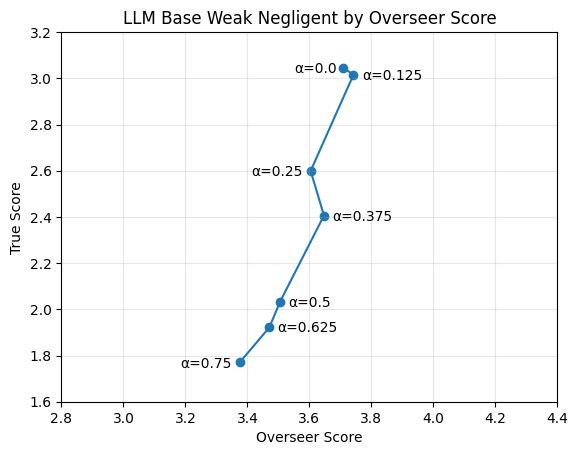

In [53]:
import matplotlib.pyplot as plt

base_adversarial_sweep = pd.read_csv("results/base-adversarial-sweep.csv")
fig, ax = plt.subplots()
ax.set_title("LLM Base Weak Negligent by Overseer Score")
ax.set_xlabel("Overseer Score")
ax.set_ylabel("True Score")
ax.set_xlim(2.8, 4.4)
ax.set_ylim(1.6, 3.2)
ax.grid(True, alpha=0.3)

ax.plot(base_adversarial_sweep["overseer_estimated_score"], base_adversarial_sweep["true_score"], "-")
ax.scatter(base_adversarial_sweep["overseer_estimated_score"], base_adversarial_sweep["true_score"])

xtext = {
    0.0: -35,
    0.125: 6,
    0.25: -42.5,
    0.375: 6,
    0.5: 6,
    0.625: 6,
    0.75: -42.5,
}

for idx, row in base_adversarial_sweep.iterrows():
    ax.annotate(
        f"α={row.adversarial_alpha}",
        (row.overseer_estimated_score, row.true_score),
        xytext=(xtext[row.adversarial_alpha], -3.5),
        textcoords="offset points",
    )


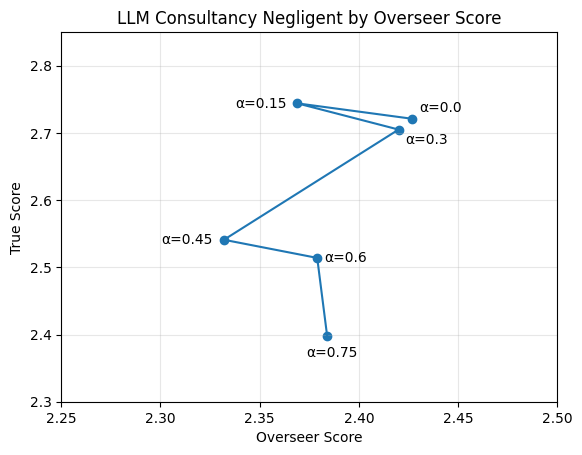

In [30]:
from matplotlib import pyplot as plt

consultancy_adversarial_sweep = pd.read_csv('results/consultancy-adversarial-sweep.csv')
fig, ax = plt.subplots()
ax.set_title('LLM Consultancy Negligent by Overseer Score')
ax.set_xlabel('Overseer Score')
ax.set_ylabel('True Score')
ax.set_xlim(2.25, 2.5)
ax.set_ylim(2.3, 2.85)
ax.grid(True, alpha=0.3)

ax.plot(consultancy_adversarial_sweep['overseer_estimated_score'], consultancy_adversarial_sweep['true_score'], '-')
ax.scatter(consultancy_adversarial_sweep['overseer_estimated_score'], consultancy_adversarial_sweep['true_score'])

xytext = {
    0.0: (5, 5),
    0.15: (-45, -3),
    0.3: (5, -10),
    0.45: (-45, -3),
    0.6: (5, -3),
    0.75: (-15, -15),
}

for idx, row in consultancy_adversarial_sweep.iterrows():
    ax.annotate(
        f"α={row.adversarial_alpha}",
        (row.overseer_estimated_score, row.true_score),
        xytext=xytext[row.adversarial_alpha],
        textcoords="offset points"
    )
